# Keras Tutorial Walkthrough

This is a walk through of a simple Keras tutorial created by <a href='https://elitedatascience.com/keras-tutorial-deep-learning-in-python'> Elite Data Scienc</a>. Due to the computing restriction I didn't get to go through 10 iterations of Convolutional Neural Network but only 3. However the results are already quite good with over 90% accuracy. Other classification methods were also tried out to compare the difference. 

### Import Modules

In [1]:
import numpy as np
import theano

In [2]:
print np.__version__
print theano.__version__

1.11.3
0.8.2.dev-901275534cbfe3fbbe290ce85d1abf8bb9a5b203


In [3]:
#Default is Tensorflow. 
#Can use following command to change to Theano
#KERAS_BACKEND=theano
#from keras import backend

In [4]:
#KERAS_BACKEND #Confirm backend

In [5]:
import keras
print keras.__version__

1.1.1


Using Theano backend.


In [6]:
np.random.seed(42) #Make sure results can be reproduced
from keras.models import Sequential #Feed forward?
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Load Data

In [7]:
from keras.datasets import mnist
(X_trian,y_train), (X_test,y_test) = mnist.load_data()

In [8]:
X_train = X_trian

### Plot Data

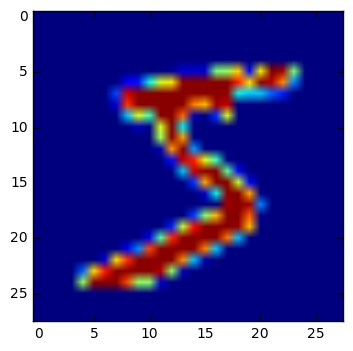

In [9]:
#Plot for sanity check
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### Preprocessing

In [10]:
# Theano requires the dimension to be set. This dimension 
# is related to colors. And our image is black and white so 
# dimension is 1. If it is full RGB, it would be 3.
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)
X_train.shape

(60000, 1, 28, 28)

In [11]:
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
y_train.shape

(60000,)

In [13]:
print y_train[:10]

[5 0 4 1 9 2 1 3 1 4]


In [14]:
# Instead of a classification label of, say '5' we want a 
# one hot encoded array just like pandas get_dummies
# The method requires array and desired dimensions as input
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [15]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [16]:
y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [17]:
y_train.shape

(60000, 10)

### Define architecture

In [18]:
# Note that the default dim_ordering is set to 'tf'
# If you want to change it to 'th', either specify in the 
# add() method or change the value to 'th' 
# in .keras/keras.json
model = Sequential()
model.add(Convolution2D(32,3,3,activation='relu',input_shape=(1,28,28)))

In [19]:
model.output_shape

(None, 32, 26, 26)

In [20]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_1[0][0]      
Total params: 320
____________________________________________________________________________________________________


In [21]:
model.add(Convolution2D(32,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # Reduce number of parameters
model.add(Dropout(0.25)) # Regularised the model to prevent overfit
# Now we have 2x conv + 1 maxpool + 1 dropout
model.add(Flatten()) #Must flattern to pass into dense
model.add(Dense(128, activation='relu')) # 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 10 ouput matches y
# softmax to find probability

In [22]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [25]:
model.fit(X_train,y_train, batch_size=32, nb_epoch=3, verbose=1)

Epoch 1/3
60000/60000 [==============================] - 296s - loss: 0.1403 - acc: 0.9583   
Epoch 2/3
60000/60000 [==============================] - 318s - loss: 0.0830 - acc: 0.9750   
Epoch 3/3
60000/60000 [==============================] - 318s - loss: 0.0671 - acc: 0.9797   


In [24]:
score = model.evaluate(X_test, y_test, verbose=0)

In [26]:
# This is a test set score which is free from training bias. 
# We can see that both the loss and accuracy got worse
# However this could be due to the fact that I reduced my nb_epoch 
# from 10 to 3 to minimise computing time
score

[0.14475859608054162, 0.9536]

### Normal 2 layers feed forward network comparison

In [18]:
# Try to compare to normal feed forward network
model_fwd = Sequential()
model_fwd.add(Flatten(input_shape=(1,28,28))) # The first layer must have the inpu_shape argument!
model_fwd.add(Dense(128, activation='relu')) # 1st layer
model_fwd.add(Dropout(0.25)) # Random number for now. Will figure out what dropout should be used later
model_fwd.add(Dense(10, activation='softmax')) # 2nd layer

model_fwd.compile(loss='categorical_crossentropy', # This has to be kept the same becasue we are doing a multi-class classification
                  optimizer='sgd', # Try using Sochastic Gradient Decent
                  metrics=['accuracy'])


In [19]:
model_fwd.fit(X_train,y_train, batch_size=32, nb_epoch=3, verbose=1)

Epoch 1/3
60000/60000 [==============================] - 7s - loss: 0.7228 - acc: 0.8001     
Epoch 2/3
60000/60000 [==============================] - 8s - loss: 0.3899 - acc: 0.8881     
Epoch 3/3
60000/60000 [==============================] - 8s - loss: 0.3270 - acc: 0.9067     


In [20]:
score_fwd = model_fwd.evaluate(X_test, y_test, verbose=0)
score_fwd

[0.25514056302607058, 0.9284]

In [19]:
# It seems that warm start is used by default so if you would like to reproduce this result you will have to restart 
# the kernel and run everything except the 2 boxes immediately above this one.
model_fwd.fit(X_train,y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 7s - loss: 0.7228 - acc: 0.8001     
Epoch 2/10
60000/60000 [==============================] - 8s - loss: 0.3899 - acc: 0.8881     
Epoch 3/10
60000/60000 [==============================] - 9s - loss: 0.3270 - acc: 0.9067     
Epoch 4/10
60000/60000 [==============================] - 9s - loss: 0.2902 - acc: 0.9174     
Epoch 5/10
60000/60000 [==============================] - 9s - loss: 0.2612 - acc: 0.9248     
Epoch 6/10
60000/60000 [==============================] - 9s - loss: 0.2407 - acc: 0.9318     
Epoch 7/10
60000/60000 [==============================] - 10s - loss: 0.2269 - acc: 0.9354    
Epoch 8/10
60000/60000 [==============================] - 10s - loss: 0.2119 - acc: 0.9397    
Epoch 9/10
60000/60000 [==============================] - 10s - loss: 0.2001 - acc: 0.9441    
Epoch 10/10
60000/60000 [==============================] - 11s - loss: 0.1891 - acc: 0.9461    


In [20]:
score_fwd = model_fwd.evaluate(X_test, y_test, verbose=0)
score_fwd
# From the result we can see that the normal 2 layers feed forward network is slightly less accurate than the
# convolution network. However it is much much much quicker in this example(~300s vs 7s) for 3 nb_epoch. However this exmple 
# has not demonstrate the real strenght of convolution netwrok which is to identify objects/pattern no matter 
# where they appear in the figure. Since the MINST data is relatively well organised with characters of 
# similar size located in the middle, the extra computation overhead of convolution is not justified in this case.

[0.15168357276692987, 0.95630000000000004]

### Compare with classic machine learning algorithms

It is demonstrated that neural networks can be great in certain problems. But how much better exactly are they. In the folllowing investigation this classification problem will be solved by various machine learning algorithms and reuslts will be compared. The following models were chosen:
- Logistic Regression (linear model which is rel;atively easy to train, widely used in various application)
- Decision Tree (Tree based algorithm and mechanism vastly different to Logistic Regression)
- Random Forest (Tree ensemble which usually out perform the former 2. Widely used in Kaggle before XGBoost comes along


In [34]:
from time import time
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score

(skX_train,sky_train), (skX_test,sky_test) = mnist.load_data()
skX_train = skX_train.astype('float32')
skX_test = skX_test.astype('float32')
skX_train /= 255
skX_test /= 255

In [22]:
fskX_train = [i.flatten() for i in skX_train]
fskX_test = [i.flatten() for i in skX_test]

In [40]:
# Test with Logistic Regression
clf = logreg()
t0 = time()
model_logreg = clf.fit(fskX_train,sky_train)
t1 = time()
pred = model_logreg.predict(fskX_test)
t2 = time()
print 'Logistic Regression Accuracy: ',accuracy_score(sky_test, pred)
print 'Training time: ', t1-t0
print 'Predicting time: ', t2-t1

Logistic Regression Accuracy:  0.9201
Training time:  119.517117977
Predicting time:  0.0773661136627


The result from Logistic Regression is actually surprising. Given the MINST data sets were also explored using neural networks, one would expect there would be a huge difference when comparing to normal algorithms. However in this case Logistic Regerssion manages to obtain a respectable result of 92%. It would be interesing to see how other algorithms perform.

In [41]:
clf = dt()
t0 = time()
model_dt = clf.fit(fskX_train,sky_train)
t1 = time()
pred = model_dt.predict(fskX_test)
t2 = time()
print 'Decision Tree Accuracy: ',accuracy_score(sky_test, pred)
print 'Training time: ', t1-t0
print 'Predicting time: ', t2-t1

Decision Tree Accuracy:  0.8774
Training time:  26.6435880661
Predicting time:  0.0309979915619


In [42]:
clf = rf(n_estimators=150, n_jobs=-1)
t0 = time()
model_rf = clf.fit(fskX_train,sky_train)
t1 = time()
pred = model_rf.predict(fskX_test)
t2 = time()
print 'Random Forest Accuracy: ',accuracy_score(sky_test, pred)
print 'Training time: ', t1-t0
print 'Predicting time: ', t2-t1

Random Forest Accuracy:  0.9702
Training time:  48.4489850998
Predicting time:  0.874017953873


In [33]:
# Didn't measure the time for SVM as it significantly longer than DT and RF
clf_svm = SVC()
model_svm = clf_svm.fit(fskX_train,sky_train)
pred = model_svm.predict(fskX_test)
print accuracy_score(sky_test, pred)

0.9446


It can be seen that the vanilla Tree model is considerably weaker than Logistic Regression. However once ensembled in a Random Forest, the performance (97% accuracy)beats even 10 epochs 2 layers neural network. Although this is by no means a vigrous test i.e. not cross validated and no hyper-parameters tuning. This is enough for one to think about how and why neural networks are 'better'. Since PCA was used with good success in some image recognition tasks such as the famous Eigenfaces exercise, it will be tested here to see if it gives any benefit.

In [23]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pca = PCA().fit(fskX_train)
pca_fskXtrain = pca.transform(fskX_train)
pca_fskXtest = pca.transform(fskX_test)

In [27]:
pca_original = pca_fskXtrain.reshape(60000,28,28)

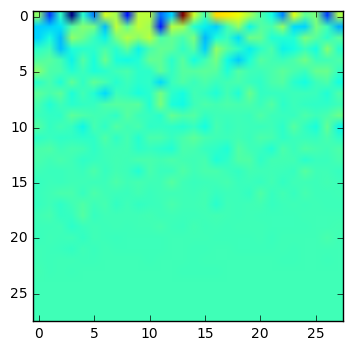

In [30]:
plt.imshow(pca_original[0])
plt.show()
# Interestingly unlike the Eigenfaces exercise this PC does not show anything even remotely like a number. 

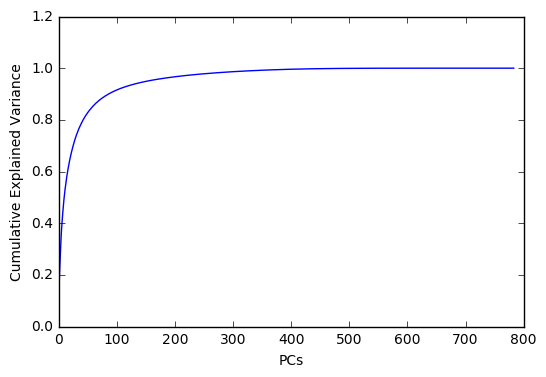

In [30]:
plt.plot(range(np.array(fskX_train).shape[1]),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('PCs')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [31]:
# We can see that 200 PCs should be a good place to try as the increase in variance explained is very small after this point
clf_svm = SVC()
model_svm = clf_svm.fit(pca_fskXtrain[:,:200],sky_train)
pred = model_svm.predict(pca_fskXtest[:,:200])
print accuracy_score(sky_test, pred)

0.9672


In [32]:
clf = rf(n_estimators=150, n_jobs=-1)
model_rf = clf.fit(pca_fskXtrain[:,:200],sky_train)
pred = model_rf.predict(pca_fskXtest[:,:200])
print accuracy_score(sky_test, pred)

0.9494


It seems that PCA decreases the performance of Random Forest but it boosted SVM up to 96.72% 

### Small conclusion


This brief walk through started with the intention to learn the basics of Keras and has developed slightly into a comparison between various algorithms.I have tested out a number of models with various test set results:
- 3 epoch Convolutional Neural Network (95.35%)
- 3 epoch Feed Forward Neural Network (92.84%)
- 10 epoch Feed Forward Neural Network (95.63%)
- Logistic Regression (92.01%)
- Decision Tree (87.88%)
- 150 Trees Random Forest (97.06%)
- SVM (94.46%)
- 200 PC SVM (96.72%)
- 200 PC 150 Tree Random Forest (94.94%)

It can be seen that surprisingly Neural Networks are not the best performers amongst the group. A normal Random Forest and a SVM with PCA applied managed to trump the NNs with 1-1.4% accuracy. This is a rahter surprising result as image recognition tasks and specifically MINST data has been used to demonstrate the power of NN over and over again. And it turns out they seem to be not that much better. However we should bare in mind that a >99% accuracy was achieved by the Elite Data Science team in the tutorial. The low accuracy here is very likely related to the low number of iterations performed. Therefore one might suspect that give enough time NNs will beat the traditional algorithms in accuracy. However as we can see in the above runs a CNN spends about 300s (in this PC using a 2 threads CPU)in 1 epoch and 10 epochs would take me 50 minutes.In contrast a Random Forest would take less than 50 seconds and gives a still respectable 97% accuracy. This again comes down to accuracy and speed trade off.

PCA seems to be not adding too much value when we look at the experiment result. However from the experience gained in another <a href='https://github.com/ricky-return42/Capstone/blob/master/Capstone_Technical_Report.ipynb'>project</a>, we know that using variance explained to choose the number of PCs does not necessarily gives the best result. Hence it might be worthwhile to perform the test repeatedly in order to search for the best number of PCs.

It would be great to use GPU in future work as they are optimised for NN type operations. Then one might perform grid search and cross validation to optimise each hyperparameters and reinforce the current findings.